In [91]:
import pandas as pd
import numpy as np
import cv2 as cvision
import math
import matplotlib.pyplot as plt
%matplotlib inline

In [116]:
im1=cvision.imread("images/im1.png")
im1=cvision.cvtColor(im1,cvision.COLOR_RGB2GRAY)

im2=cvision.imread("images/im2.png")
im2=cvision.cvtColor(im2,cvision.COLOR_RGB2GRAY)

im3=cvision.imread("images/im3.png")
im3=cvision.cvtColor(im3,cvision.COLOR_RGB2GRAY)

im4=cvision.imread("images/im4.png")
im4=cvision.cvtColor(im4,cvision.COLOR_RGB2GRAY)
result=cvision.imread("images/UDCV3.jpeg")

In [107]:
im1.shape,im2.shape,im3.shape,im4.shape

((512, 512), (512, 512), (512, 512), (512, 512))

#### river features

In [108]:
rc=[170,60]
nrc=[300,100]

xdr=[]
ydr=[]

x,y=rc[0],rc[1]
for i in range(50):
    xdr.append([im1[x][y],im2[x][y],im3[x][y],im4[x][y]])
    ydr.append(1)
    y+=1
xdr,ydr=np.array(xdr),np.array(ydr)
xdr.shape,ydr.shape

((50, 4), (50,))

#### not river features

In [109]:
xdnr=[]
ydnr=[]

x,y=nrc[0],nrc[1]
for i in range(100):
    xdnr.append([im1[x][y],im2[x][y],im3[x][y],im4[x][y]])
    ydnr.append(1)
    y+=1
xdnr,ydnr=np.array(xdnr),np.array(ydnr)
xdnr.shape,ydnr.shape

((100, 4), (100,))

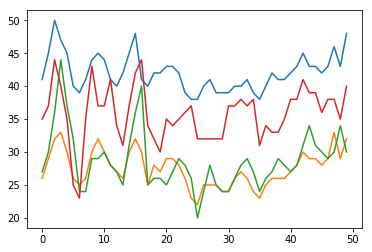

In [122]:
plt.plot(xdr)

#### mean and median for gaussian distribution

In [110]:
meanr=[]
meannr=[]
stdr=[]
stdnr=[]

def findMean(x):
    return sum(x)/len(x)

def findStd(x):
    mean=findMean(x)
    var=[math.pow(i-mean,2) for i in x]
    var=sum(var)/(len(var))
    return math.sqrt(var)


for i in range(4):
    meanr.append(findMean(xdr[:,i]))
    meannr.append(findMean(xdnr[:,i]))
    stdr.append(findStd(xdr[:,i]))
    stdnr.append(findStd(xdnr[:,i]))

#### probabilities

In [129]:
prior_river=50/150
prior_notriver=100/150

def gaussianD(x,mean,std):
    temp = math.exp(-(math.pow(x-mean,2))/(2*math.pow(std,2)))
    temp = temp/math.sqrt(2*math.pi*math.pow(std,2))
    return temp

def gaussianNB(x):
    
    probr=prior_river
    probnr=prior_notriver
    for i in range(4):
        probr *= gaussianD(x[i],meannr[i],stdr[i])
        probnr *= gaussianD(x[i],meanr[i],meannr[i])

        
    if(probr>probnr):
        return 255
    else:
        return 0

In [130]:
res=np.zeros(shape=im1.shape)

for i in range(im1.shape[0]):
    for j in range(im1.shape[1]):
        
        curxd=np.array([im1[i,j],im2[i,j],im3[i,j],im4[i,j]])
        out=gaussianNB(curxd)
        res[i,j]=out

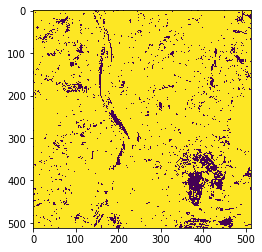

In [132]:
plt.imshow(res)